In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

In [2]:
import pickle
data_train=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/train_set_df.pickled','rb'))

In [3]:
data_test=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/test_set_df.pickled','rb'))

In [4]:

# data=pd.read_csv('facies_vectors.csv')

    
# test_well=data[data['Well Name']=='SHRIMPLIN']
# test_labels = test_well['Facies'] 

# train_data=data[data['Well Name']!='SHRIMPLIN']
# train_labels = train_data['Facies'] 
#features = ['Facies','GR', 'ILD_log10', 'DeltaPHI', 'PHIND','PE','NM_M','RELPOS']
#feature_vector_plot = data[features]

feature_use = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','PE', 'NM_M','RELPOS']
#feature_use = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND','NM_M','RELPOS']

train_feature = data_train[feature_use]
test_feature = data_test[feature_use]

xtrain=pd.DataFrame.as_matrix(train_feature)
xtest=pd.DataFrame.as_matrix(test_feature)

ytrain=pd.DataFrame.as_matrix(data_train['Facies'])-1
ytest=pd.DataFrame.as_matrix(data_test['Facies'])-1
print(xtrain.shape)
print(xtest.shape)




(3737, 7)
(412, 7)


/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [5]:
ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
N=data_train.shape[0]
M=len(feature_use)
K=data_test.shape[0]




X_train=np.zeros((N,M,M,1))

# Y_train=np.zeros((N,9))

for i in range(0,N):
    for j in range(0,M):
        for k in range(0,M):
            
            X_train[i][j][k][0]=xtrain[i][k]
        
#     Y_train[i][ytrain[i]-1]=1
    
    

X_test=np.zeros((K,M,M,1))

# Y_test=np.zeros((K,9))

for i in range(0,K):
    for j in range(0,M):
        for k in range(0,M):
            
            X_test[i][j][k][0]=xtest[i][k]
        
#     Y_test[i][ytest[i]-1]=1
    
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(ytrain.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(ytest.shape))


number of training examples = 3737
number of test examples = 412
X_train shape: (3737, 7, 7, 1)
Y_train shape: (3737,)
X_test shape: (412, 7, 7, 1)
Y_test shape: (412,)


In [7]:
import tensorflow as tf
print(tf.__version__)
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=X_train
# training_images=training_images / 255.0
test_images = X_test
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(7, 7, 1)),
#   tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(9, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(training_images, ytrain, epochs=200)
# test_loss = model.evaluate(test_images, test_labels)

/Users/zhiliwei/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.7.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 5, 8)           80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18560     
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1161      
Total params: 20,969
Trainable params: 20,969
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3737/3737 [==============================] - 0s 122us/step - loss: 1.8167 - acc: 0.3623
Epoch 2/200
3737/3737 [=========

3737/3737 [==============================] - 0s 50us/step - loss: 0.7137 - acc: 0.6939
Epoch 74/200
3737/3737 [==============================] - 0s 48us/step - loss: 0.7090 - acc: 0.6987
Epoch 75/200
3737/3737 [==============================] - 0s 46us/step - loss: 0.7163 - acc: 0.6960
Epoch 76/200
3737/3737 [==============================] - 0s 48us/step - loss: 0.7108 - acc: 0.7003
Epoch 77/200
3737/3737 [==============================] - 0s 53us/step - loss: 0.7173 - acc: 0.6990
Epoch 78/200
3737/3737 [==============================] - 0s 52us/step - loss: 0.7019 - acc: 0.6995
Epoch 79/200
3737/3737 [==============================] - 0s 52us/step - loss: 0.7049 - acc: 0.6987
Epoch 80/200
3737/3737 [==============================] - 0s 45us/step - loss: 0.6967 - acc: 0.7011
Epoch 81/200
3737/3737 [==============================] - 0s 44us/step - loss: 0.7035 - acc: 0.7043
Epoch 82/200
3737/3737 [==============================] - 0s 47us/step - loss: 0.6974 - acc: 0.7078
Epoch 83/200


3737/3737 [==============================] - 0s 58us/step - loss: 0.5236 - acc: 0.7841
Epoch 155/200
3737/3737 [==============================] - 0s 66us/step - loss: 0.5281 - acc: 0.7771
Epoch 156/200
3737/3737 [==============================] - 0s 103us/step - loss: 0.5460 - acc: 0.7653
Epoch 157/200
3737/3737 [==============================] - 0s 48us/step - loss: 0.5080 - acc: 0.7902
Epoch 158/200
3737/3737 [==============================] - 0s 53us/step - loss: 0.5340 - acc: 0.7704
Epoch 159/200
3737/3737 [==============================] - 0s 53us/step - loss: 0.5296 - acc: 0.7736
Epoch 160/200
3737/3737 [==============================] - 0s 57us/step - loss: 0.5186 - acc: 0.7776
Epoch 161/200
3737/3737 [==============================] - 0s 53us/step - loss: 0.5180 - acc: 0.7859
Epoch 162/200
3737/3737 [==============================] - 0s 44us/step - loss: 0.5287 - acc: 0.7704
Epoch 163/200
3737/3737 [==============================] - 0s 54us/step - loss: 0.5089 - acc: 0.7841
Epo

In [8]:
test_loss = model.evaluate(test_images, ytest)

412/412 [==============================] - 0s 137us/step


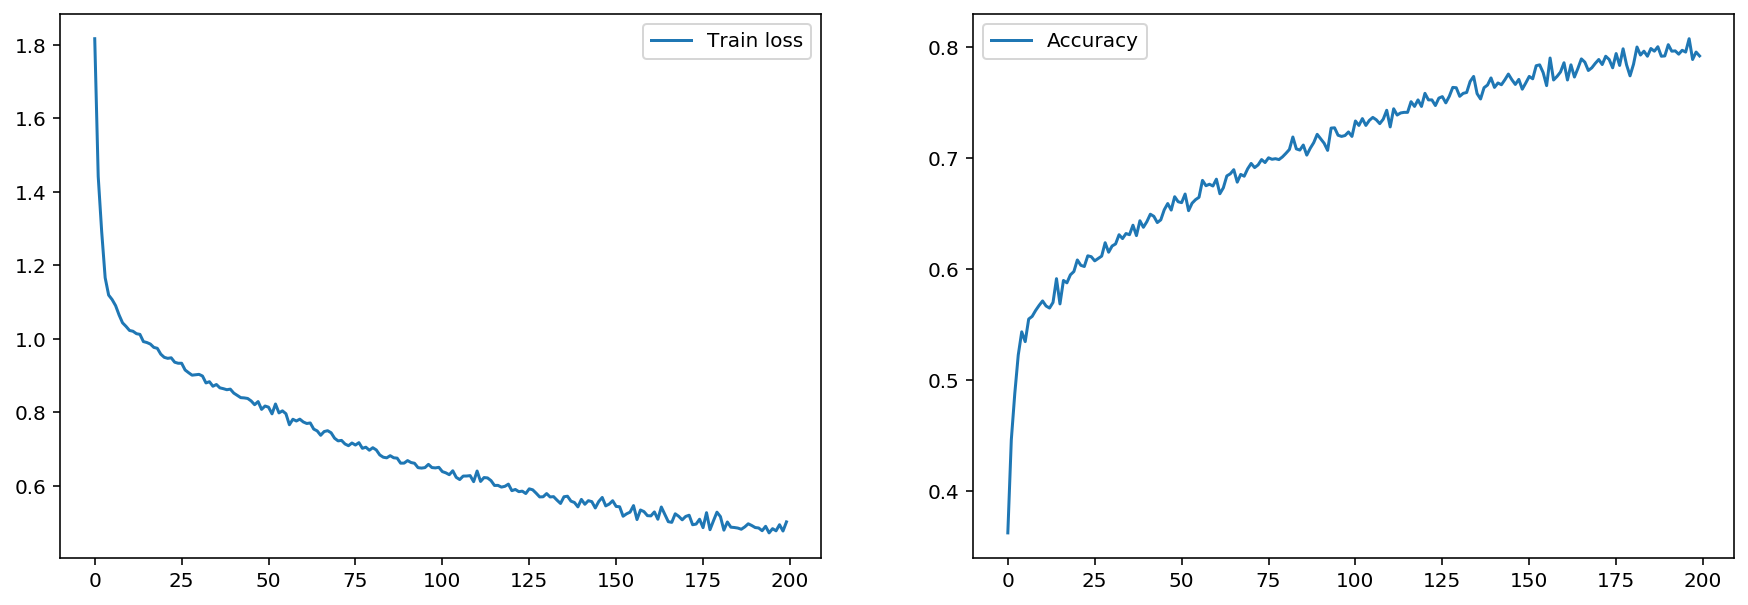

In [9]:
fig, (ax_loss, ax_score) = plt.subplots(1, 2, figsize=(15,5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
# ax_loss.plot(history.epoch, history.history["acc"], label="Accuracy")
ax_loss.legend()
ax_score.plot(history.epoch, history.history["acc"], label="Accuracy")
# ax_score.plot(history.epoch, history.history["val_my_iou_metric_2"], label="Validation score")
ax_score.legend()

In [10]:
ynew = model.predict_classes(test_images)


In [11]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

conf = confusion_matrix(ytest+1, ynew+1)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    16    10                                              26
     CSiS     5    68    21                                        94
     FSiS     1    25    48     1     2                 1          78
     SiSh                 1    21           1           4          27
       MS           1     1     1    10     9     1     6          29
       WS     1     1           6    11    27          12          58
        D                             3           8     3          14
       PS                 1     1     3    10          48     5    68
       BS                                               1    17    18

Precision  0.70  0.65  0.67  0.70  0.34  0.57  0.89  0.64  0.77  0.64
   Recall  0.62  0.72  0.62  0.78  0.34  0.47  0.57  0.71  0.94  0.64
       F1  0.65  0.68  0.64  0.74  0.34  0.51  0.70  0.67  0.85  0.63


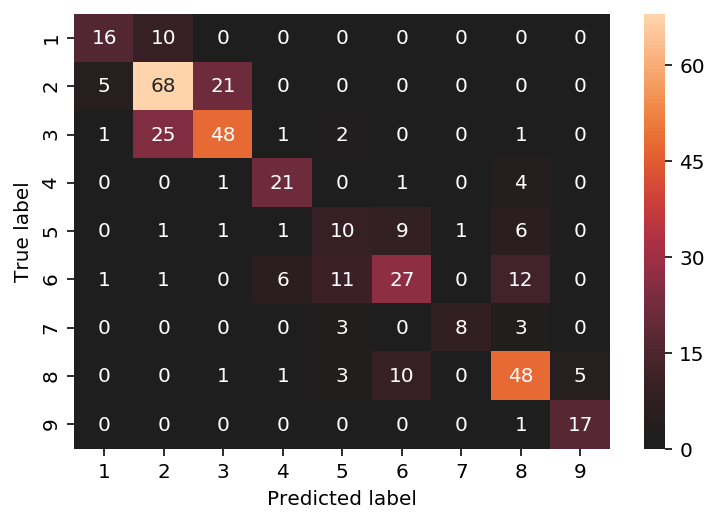

In [12]:
temp=['1','2','3','4','5','6','7','8','9']
import seaborn as sns
sns.heatmap(conf,annot=True, center=True,fmt='d',xticklabels=temp,yticklabels=temp)
plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.show()

In [13]:
display_adj_cm(conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    26                                                    26
     CSiS          94                                              94
     FSiS     1          73     1     2                 1          78
     SiSh                 1    21           1           4          27
       MS           1     1          20           1     6          29
       WS     1     1           6          50                      58
        D                             3          11                14
       PS                 1     1     3                63          68
       BS                                                    18    18

Precision  0.93  0.98  0.96  0.72  0.71  0.98  0.92  0.85  1.00  0.91
   Recall  1.00  1.00  0.94  0.78  0.69  0.86  0.79  0.93  1.00  0.91
       F1  0.96  0.99  0.95  0.75  0.70  0.92  0.85  0.89  1.00  0.91
